<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team44/blob/main/TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tecnológico de Monterrey**

#Maestría en Inteligencia Artificial Aplicada

> Curso: Ciencia y Analítica de Datos

> Entregable : Entregable : Semana 7 - Actividad Regresiones y K means - Notebook 1

>Fecha: 9/11/2022

>Profesores:

>* María de la Paz Rico Fernández
>* Roberto Antonio Guevara González

> Alumno:

*   AQUILES YONATAN ARMENTA HERNANDEZ - A01793252


# Ejercicio 1


Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

>Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

>Regresión Lineal.
* Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

>Regresión Polinomial.
* Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

>Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

>Finalmente grafica :
* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)
* Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [ ]:
# LIBRERIAS NECESARIAS PARA EL PROYECTO
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_validate,RepeatedKFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# LECTURA DEL DATASET
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [ ]:
# SPLIT  DE LA MUESTRA
X = df[['Number of Units']] # X
y = df['Manufacturing Cost'] # Y
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=10)

# METRICAS NECESARIAS
metricas = {
    "R2":"r2",
    "MAE":'neg_mean_absolute_error'
}

resultados = list()

In [ ]:
def grafica(y_fit):
  plt.scatter(X, y)

  order = np.argsort(X_test.values.ravel())
  x_order = X_test.values.ravel()[order]
  y_order = y_test.values.ravel()[order]
  y_fit_order = y_fit[order]

  plt.plot(x_order, y_fit_order, 'r-', linewidth=2, label='Predictions')
  plt.xlabel('$X$', fontsize=18)
  plt.ylabel('$y$', fontsize=18)
  plt.legend(loc='upper left',fontsize=14)


## Regresion Lineal

In [ ]:
# REGRESION LINEAL
LR = LinearRegression(fit_intercept=True)
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(LR,X_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)
LR.fit(X_train,y_train)

LinearRegression()

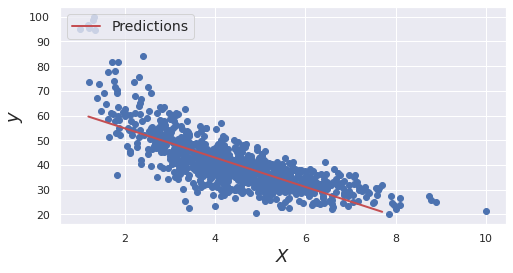

In [ ]:
# GRAFICAMOS LOS VALORES OBTENIDOS
y_fit = LR.predict(X_test)
grafica(y_fit)

In [ ]:
LR.coef_, LR.intercept_

(array([-5.917708]), 66.6344123257405)

**The model estimates:**

 𝑦̂ = -5.91 + 66.63 

In [ ]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test,y_fit))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,y_fit)))
print('R2_score', r2_score(y_test,y_fit))

Error medio Absoluto (MAE): 5.287283133809135
Root Mean Squared Error : 7.27426391400127
R2_score 0.5695617538713827


## Regresion Polinomial


In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
poly_lr = LinearRegression(fit_intercept=True)
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(poly_lr ,X_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)
poly_lr.fit(X_poly,y_train)

LinearRegression()

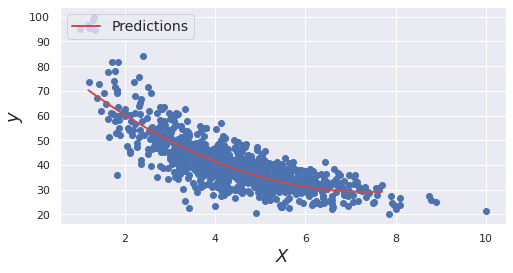

In [ ]:
X_poly = poly_features.transform(X_test)
y_fit_poly = poly_lr.predict(X_poly)
grafica(y_fit_poly)

In [ ]:
poly_lr.coef_, poly_lr.intercept_

(array([-15.79822837,   1.06832436]), 87.51583264485228)

The model estimates:

$\hat{y} =  -15.79X +1.06X^2 + 87.51$

In [ ]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_order,y_fit_order))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_order,y_fit_order)))
print('R2_score', r2_score(y_order,y_fit_order))

Error medio Absoluto (MAE): 5.287283133809135
Root Mean Squared Error : 7.27426391400127
R2_score 0.5695617538713829


## RIDGE

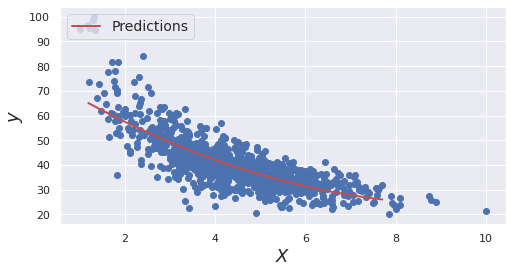

In [ ]:
modelo_ridge = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=10, solver='cholesky', random_state=10))
])

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(modelo_ridge ,X_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)

modelo_ridge.fit(X_train, y_train)

y_fit_ridge =modelo_ridge.predict(X_test)
grafica(y_fit_ridge)

In [ ]:
modelo_ridge['ridge'].coef_, modelo_ridge['ridge'].intercept_

(array([-15.17093432,   7.56898045]), 40.20534356581247)

The model estimates:

$\hat{y} =  -15.17X +7.56X^2 + 40.20$

In [ ]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_order,y_fit_ridge))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_order,y_fit_ridge)))
print('R2_score', r2_score(y_order,y_fit_ridge))

Error medio Absoluto (MAE): 10.30409991663711
Root Mean Squared Error : 14.018357476014254
R2_score -0.5985528803595088


## LASSO

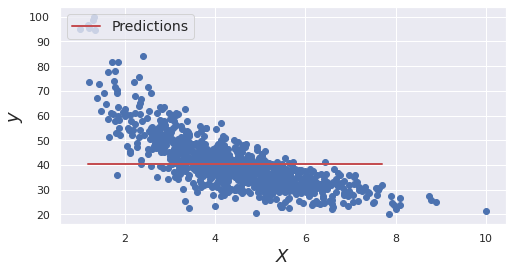

In [ ]:
modelo_lasso = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=10, random_state=10))
])

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(modelo_lasso ,X_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)

modelo_lasso.fit(X_train, y_train)

y_fit_lasso = modelo_lasso.predict(X_test)
grafica(y_fit_lasso)

In [ ]:
modelo_lasso['lasso'].coef_,modelo_lasso['lasso'].intercept_

(array([-0., -0.]), 40.2053435658125)

The model estimates:

$\hat{y} =  -0X - 0X^2 + 40.20$

In [ ]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_order,y_fit_lasso))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_order,y_fit_lasso)))
print('R2_score', r2_score(y_order,y_fit_lasso))

Error medio Absoluto (MAE): 8.028502438036874
Root Mean Squared Error : 11.113634475035296
R2_score -0.004719806882786282


## GRAFICAS

### R2

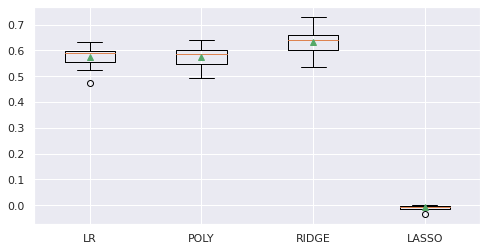

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

R2list = list()
for i in range(len(resultados)):
  r2 = resultados[i]['test_R2']
  R2list.append(r2)

plt.boxplot(R2list, labels=['LR','POLY','RIDGE','LASSO'],showmeans=True)
plt.show()

### MAE

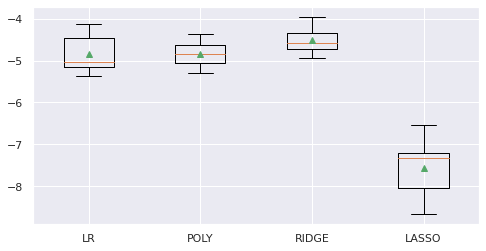

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

MAElist = list()
for i in range(len(resultados)):
  mae = resultados[i]['test_MAE']
  MAElist.append(mae)

plt.boxplot(MAElist, labels=['LR','POLY','RIDGE','LASSO'],showmeans=True)
plt.show() 

## Conclusiones

Revisando los modelos de la Regresion Lineal, Regresion Polinomial, Ridge y Lasso para R2 y MAE, podemos concluir que el mejor modelo es RIDGE R2, con el siguiente modelo:

*   𝑦̂ =−15.17𝑋+7.56𝑋2+40.20

Con los siguientes valores:

* Error medio Absoluto (MAE): 10.30409991663711
* Root Mean Squared Error : 14.018357476014254
* R2_score -0.5985528803595088

Se uso un porcentaje del 80% de Informacion para Entrenamiento y 20% para evaluación



# Ejercicio 2

Ejercicio 2. Encuentra el mejor regresor para los datos de las casas:

>Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

>Regresión Múltiple Lineal.
* Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

>Regresión Múltiple Polinomial.
* Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

>Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

>Finalmente gráfica :
* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)
* Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

In [ ]:
# LECTURA DEL DATASET
df2 = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# LIMPIAMOS LA DATA DE DATOS QUE NO SON NECESARIOS
df2.drop('id',axis=1,inplace=True)
df2.drop('zipcode',axis=1,inplace=True)
df2.drop('lat',axis=1,inplace=True)
df2.drop('long',axis=1,inplace=True)
df2.drop('date', axis=1, inplace=True)

In [ ]:
def graficaM(y_fit):
  plt.scatter(X, y)

  order = np.argsort(X_test.values.ravel())
  x_order = X_test.values.ravel()[order]
  y_order = y_test.values.ravel()[order]
  y_fit_order = y_fit[order]

  plt.plot(x_order, y_fit_order, 'r-', linewidth=2, label='Predictions')
  plt.xlabel('$X$', fontsize=18)
  plt.ylabel('$y$', fontsize=18)
  plt.legend(loc='upper left',fontsize=14)

In [ ]:
# SPLIT  DE LA MUESTRA
mX = df2.columns.drop('price')

X = df2[mX] # X
y = df2['price'] # y

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=10)

# METRICAS NECESARIAS
metricas = {
    "R2":"r2",
    "MAE":'neg_mean_absolute_error'
}

resultados = list()

## Regresion Lineal Multiple

In [ ]:
# REGRESION LINEAL
LRM = LinearRegression(fit_intercept=True)
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(LRM,X_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)
LRM.fit(X_train,y_train)
y_fit = LRM.predict(X_test)

In [ ]:
# OBTENEMOS LOS VALORES 
print(LRM.coef_.ravel(), LRM.intercept_)

[-3.76683274e+04  4.27364791e+04  1.02300342e+02 -7.69755024e-02
  2.31889484e+04  5.51599951e+05  4.41166108e+04  2.09451037e+04
  1.24305790e+05  4.91681504e+01  5.31321920e+01 -3.46978539e+03
  4.68331247e+00  2.99056709e+01 -4.58858771e-01] 5972932.920183142


The model estimates:

𝑦̂ =-3.76𝑋1 + 4.27𝑋2 + 1.02X3 - 7.69X4 + 2.31X5 + 5.51X6 + 4.41X7 + 2.09X8 + 1.24 X9 + 4.91X10 + 5.31X11 - 3.46X12 + 4.68X13 + 2.99X14 - 4.58X15 + 5972932.92

In [ ]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test,y_fit))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,y_fit)))
print('R2_score', r2_score(y_test,y_fit))

Error medio Absoluto (MAE): 139557.22435871416
Root Mean Squared Error : 224280.2878492429
R2_score 0.655690716581879


### Regresion Polinomial Multiple

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
poly_lr = LinearRegression(fit_intercept=True)
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(poly_lr ,X_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)
poly_lr.fit(X_poly,y_train)
X_poly_transform = poly_features.transform(X_test)
y_fit_poly = poly_lr.predict(X_poly_transform)


In [ ]:
# OBTENEMOS LOS VALORES 
print(poly_lr.coef_.ravel(), poly_lr.intercept_)

[ 1.08105215e+06 -1.02221957e+06 -1.01827869e+03 -3.63059434e+01
 -2.11606976e+06 -3.98422047e+06 -3.12993867e+05  5.30011189e+05
  1.27469467e+06 -4.95704771e+02 -2.67320857e+02 -7.27527747e+04
 -3.38519349e+03  4.03130255e+03 -2.14745422e+01  8.62578909e+02
  3.73270565e+03 -1.43758738e+01  2.50428132e-01  1.70733704e+04
 -1.39743510e+03  3.00863534e+02 -2.44882404e+03 -2.93344801e+03
 -3.73308824e+00 -1.23352901e+01 -5.58205558e+02 -6.70675743e+00
  1.85973107e+01  6.09189442e-02 -1.11567570e+04  1.93913879e+01
 -5.52683965e-01 -2.10724190e+04  6.55085208e+04  2.66266651e+03
 -4.00515058e+03  1.46476016e+04  1.00098064e+01  9.77850349e+00
  5.04864921e+02 -2.11325574e+01 -1.69104967e+01  4.61692289e-01
  1.51860305e+00  1.07165989e+01 -1.70106330e+01  8.40224936e+01
 -5.97597995e+00  8.29189236e+00  2.72373361e+01 -7.26580676e-01
 -1.52941126e+00  1.44429615e+00 -2.06890608e-02  1.18726349e+00
  2.57006355e+00  9.03150067e-07  3.23923293e-01  1.39536242e-01
  1.22170938e-02  4.12774

The model estimates:

𝑦̂ =1.08𝑋1 ..... + 2.09X135 + 67060593.34

In [ ]:
order = np.argsort(X_test.values.ravel())
x_order = X_test.values.ravel()[order]
y_order = y_test.values.ravel()
y_fit_order =y_fit_poly

In [ ]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_order,y_fit_order))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_order,y_fit_order)))
print('R2_score', r2_score(y_order,y_fit_order))

Error medio Absoluto (MAE): 124347.09418373529
Root Mean Squared Error : 192576.30094959823
R2_score 0.7461529015147186


## RIDGE

In [ ]:
modelo_ridge = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=10, solver='cholesky', random_state=10))
])

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(modelo_ridge ,X_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)

modelo_ridge.fit(X_train, y_train)

y_fit_ridge = modelo_ridge.predict(X_test)

In [ ]:
# OBTENEMOS LOS VALORES 
modelo_ridge['ridge'].coef_, modelo_ridge['ridge'].intercept_

(array([ 6.45140493e+04,  1.55918051e+04, -4.54028008e+03, -1.00986686e+05,
        -2.87695912e+04, -3.04488078e+04, -2.72195569e+04,  4.05170888e+04,
         7.56899691e+04, -7.26739443e+03,  4.15711442e+03, -8.45994981e+04,
        -6.06046444e+04,  1.19363837e+05,  8.57535605e+03,  9.10411467e+03,
        -2.10103461e+04, -3.53641536e+04,  1.56200114e+04,  2.93588922e+04,
         2.20175399e+02,  2.72639524e+03,  1.20266618e+04, -7.05723490e+03,
        -3.08953613e+04, -2.32151915e+04, -9.30339840e+04,  5.22488749e+03,
         5.46067304e+04,  7.67131077e+03, -1.18853463e+04,  5.82843863e+04,
        -4.40513775e+04, -3.19154020e+04,  2.24595376e+04,  6.10477606e+03,
        -4.70221202e+04,  8.59886755e+04,  6.31200092e+04,  1.30296480e+04,
         2.65226234e+04, -2.58782694e+04, -8.15253955e+04,  3.45430069e+04,
         1.78988071e+04, -3.94909818e+04, -4.30326157e+04,  1.81789510e+04,
        -4.60937345e+03,  7.46661203e+03,  1.80971839e+05,  2.68645666e+04,
        -1.5

The model estimates:

𝑦̂ = 6.45𝑋1 ..... - 5.35X135 + 540243.26

In [ ]:
order = np.argsort(X_test.values.ravel())
x_order = X_test.values.ravel()[order]
y_order = y_test.values.ravel()
y_fit_order = y_fit_ridge

In [ ]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_order,y_fit_order))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_order,y_fit_order)))
print('R2_score', r2_score(y_order,y_fit_order))

Error medio Absoluto (MAE): 125878.17822092563
Root Mean Squared Error : 195200.0212048077
R2_score 0.7391887960699358


## LASSO

In [ ]:
import warnings
warnings.filterwarnings("ignore")

modelo_lasso = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=10, random_state=10))
])

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(modelo_lasso ,X_train,y_train,scoring=metricas,cv=kfold)
resultados.append(scores)

modelo_lasso.fit(X_train, y_train)

y_fit_lasso = modelo_lasso.predict(X_test)

In [ ]:
# OBTENEMOS LOS VALORES 
modelo_lasso['lasso'].coef_, modelo_lasso['lasso'].intercept_

(array([ 7.95035403e+04,  1.09774008e+05,  5.12981975e+04, -1.05654280e+05,
        -3.91595478e+04, -9.05914599e+02,  5.45333588e+04,  4.21201912e+04,
         2.17270247e+05, -1.19543136e+05, -3.66437725e+04, -9.35689622e+04,
        -9.74112859e+04,  6.39187860e+04, -1.57438800e+03,  9.53195592e+03,
        -2.08927097e+04, -6.74373245e+04,  1.73627853e+04,  3.24343520e+04,
        -1.74795673e+02,  2.07674365e+03,  9.76558272e+03, -1.28479549e+04,
        -1.31642157e+04, -1.18333597e+04, -1.05235794e+05,  5.92832985e+03,
         6.51688110e+04,  6.97864499e+03, -1.22375300e+04,  1.51834147e+05,
        -4.76653248e+04, -3.65057309e+04,  2.25640621e+04,  8.38269018e+03,
        -5.17904934e+04,  1.16739761e+05, -8.41587532e+03, -1.72515956e+04,
        -7.50290604e+04, -2.75778168e+04, -1.07097666e+05,  3.86767002e+04,
         6.63336846e+04, -1.22379873e+04, -2.93927188e+04, -4.84548216e+03,
         7.50210842e+04, -2.61083172e+04,  2.68641243e+05, -2.29899993e+05,
        -3.3

The model estimates:

𝑦̂ = 7.95𝑋1 ..... - 7.37X135 + 540243.26

In [ ]:
order = np.argsort(X_test.values.ravel())
x_order = X_test.values.ravel()[order]
y_order = y_test.values.ravel()
y_fit_order = y_fit_lasso

In [ ]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_order,y_fit_order))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_order,y_fit_order)))
print('R2_score', r2_score(y_order,y_fit_order))

Error medio Absoluto (MAE): 125894.57620461189
Root Mean Squared Error : 195668.13765745916
R2_score 0.7379363739733451


## GRAFICAS

### R2

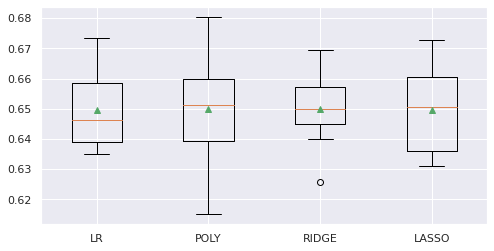

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

R2list = list()
for i in range(len(resultados[0])):
  r2 = resultados[i]['test_R2']
  R2list.append(r2)

plt.boxplot(R2list, labels=['LR','POLY','RIDGE','LASSO'],showmeans=True)
plt.show()

### MAE

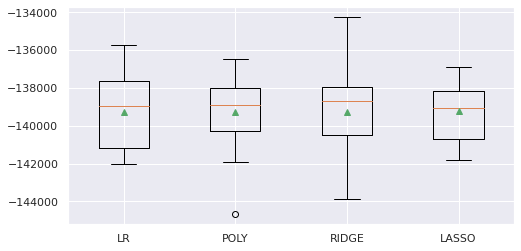

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

MAElist = list()
for i in range(len(resultados[0])):
  mae = resultados[i]['test_MAE']
  MAElist.append(mae)

plt.boxplot(MAElist, labels=['LR','POLY','RIDGE','LASSO'],showmeans=True)
plt.show() 

## Conclusiones

Revisando los modelos de la Regresion Lineal Multiple, Regresion Polinomial, Ridge y Lasso para R2 y MAE , podemos concluir que el mejor modelo es REGRESION LINEAL MULTIPLE R2, con el siguiente modelo:

*   The model estimates:

𝑦̂ =-3.76𝑋1 + 4.27𝑋2 + 1.02X3 - 7.69X4 + 2.31X5 + 5.51X6 + 4.41X7 + 2.09X8 + 1.24 X9 + 4.91X10 + 5.31X11 - 3.46X12 + 4.68X13 + 2.99X14 - 4.58X15 + 5972932.92

Con los siguientes valores:

* Error medio Absoluto (MAE): 139557.22435871416
* Root Mean Squared Error : 224280.2878492429
* R2_score 0.655690716581879

Se uso un porcentaje del 80% de Informacion para Entrenamiento y 20% para evaluación